In [1]:
#import dependancies
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import seaborn as sns
import sqlite3

In [2]:
sql = "select * from wdbc"
con = sqlite3.connect("data_Yao/wdbc.db")
dataset = pd.read_sql(sql = sql , con= con)
dataset.head()


,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [95]:
dataset.isnull().values.any()


False

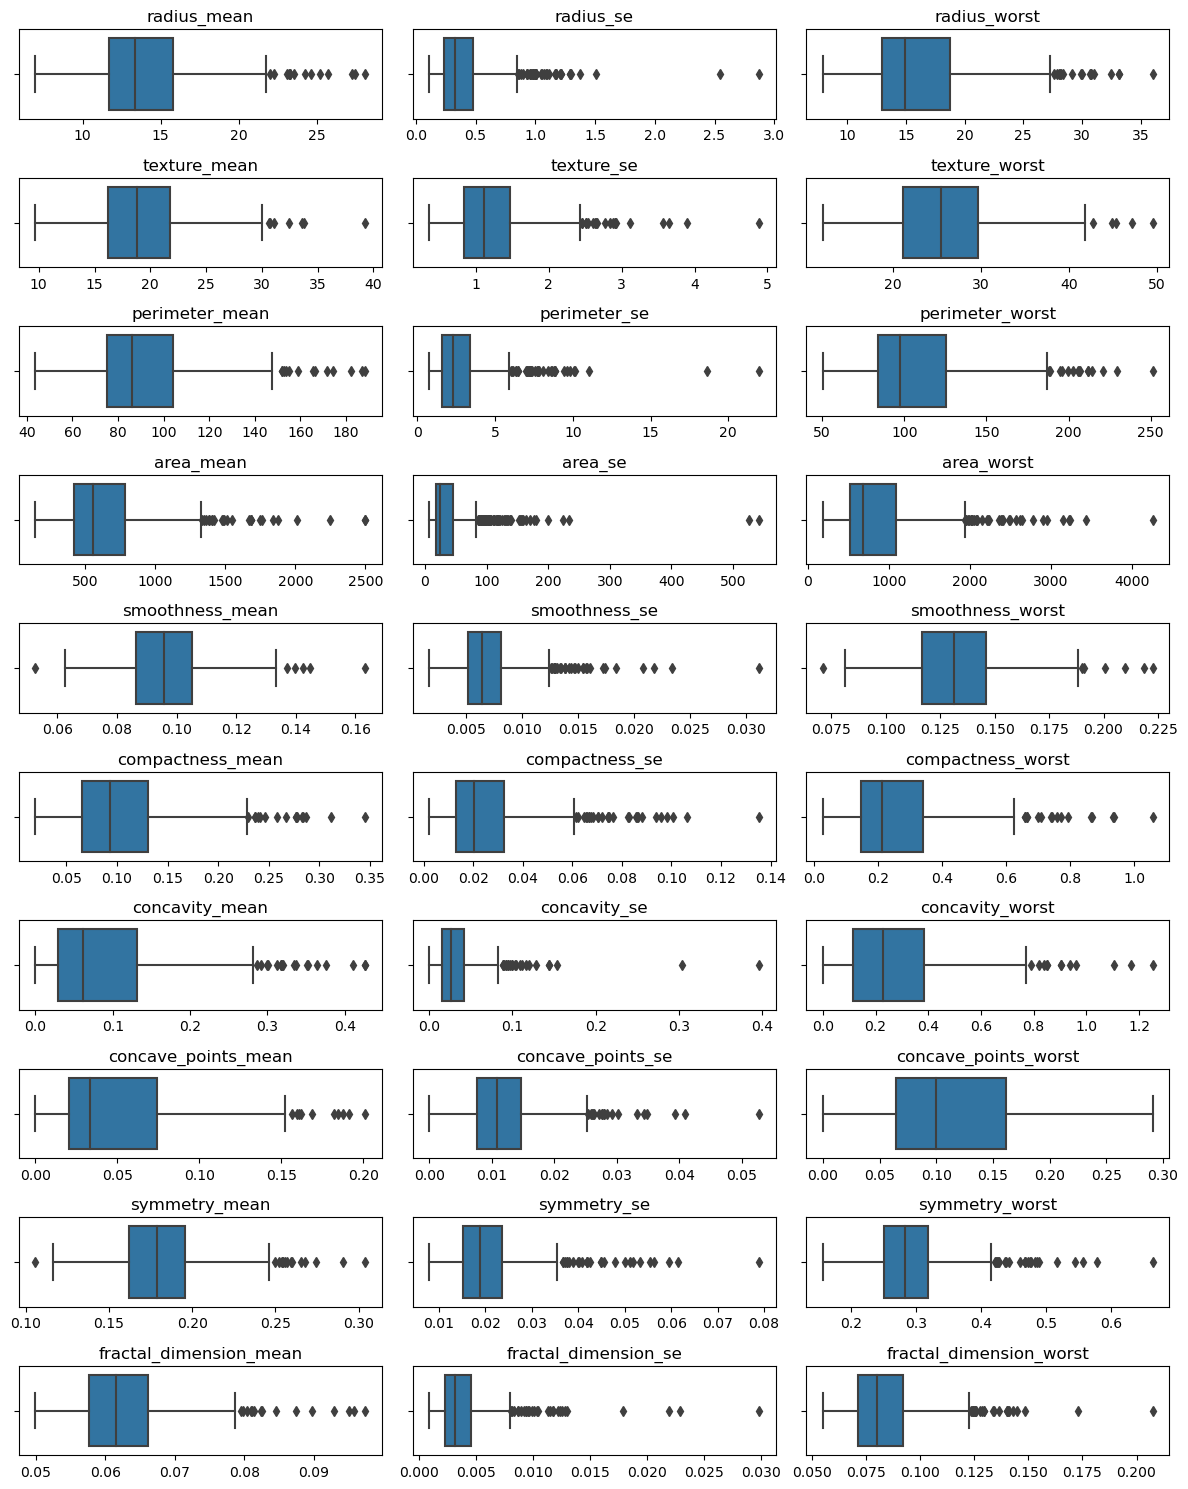

In [96]:
cols = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']
col2=['_mean','_se','_worst']

fig,axs=plt.subplots(10,3, figsize=(12,15))


for i in range(10):
    for j in range(3):
        sns.boxplot(x=cols[i]+col2[j],data=dataset, ax=axs[i,j])
        axs[i,j].set_title(cols[i]+col2[j], fontsize=12)
        axs[i,j].set_xlabel("")
        axs[i,j].set_ylabel("")

        
plt.tight_layout()

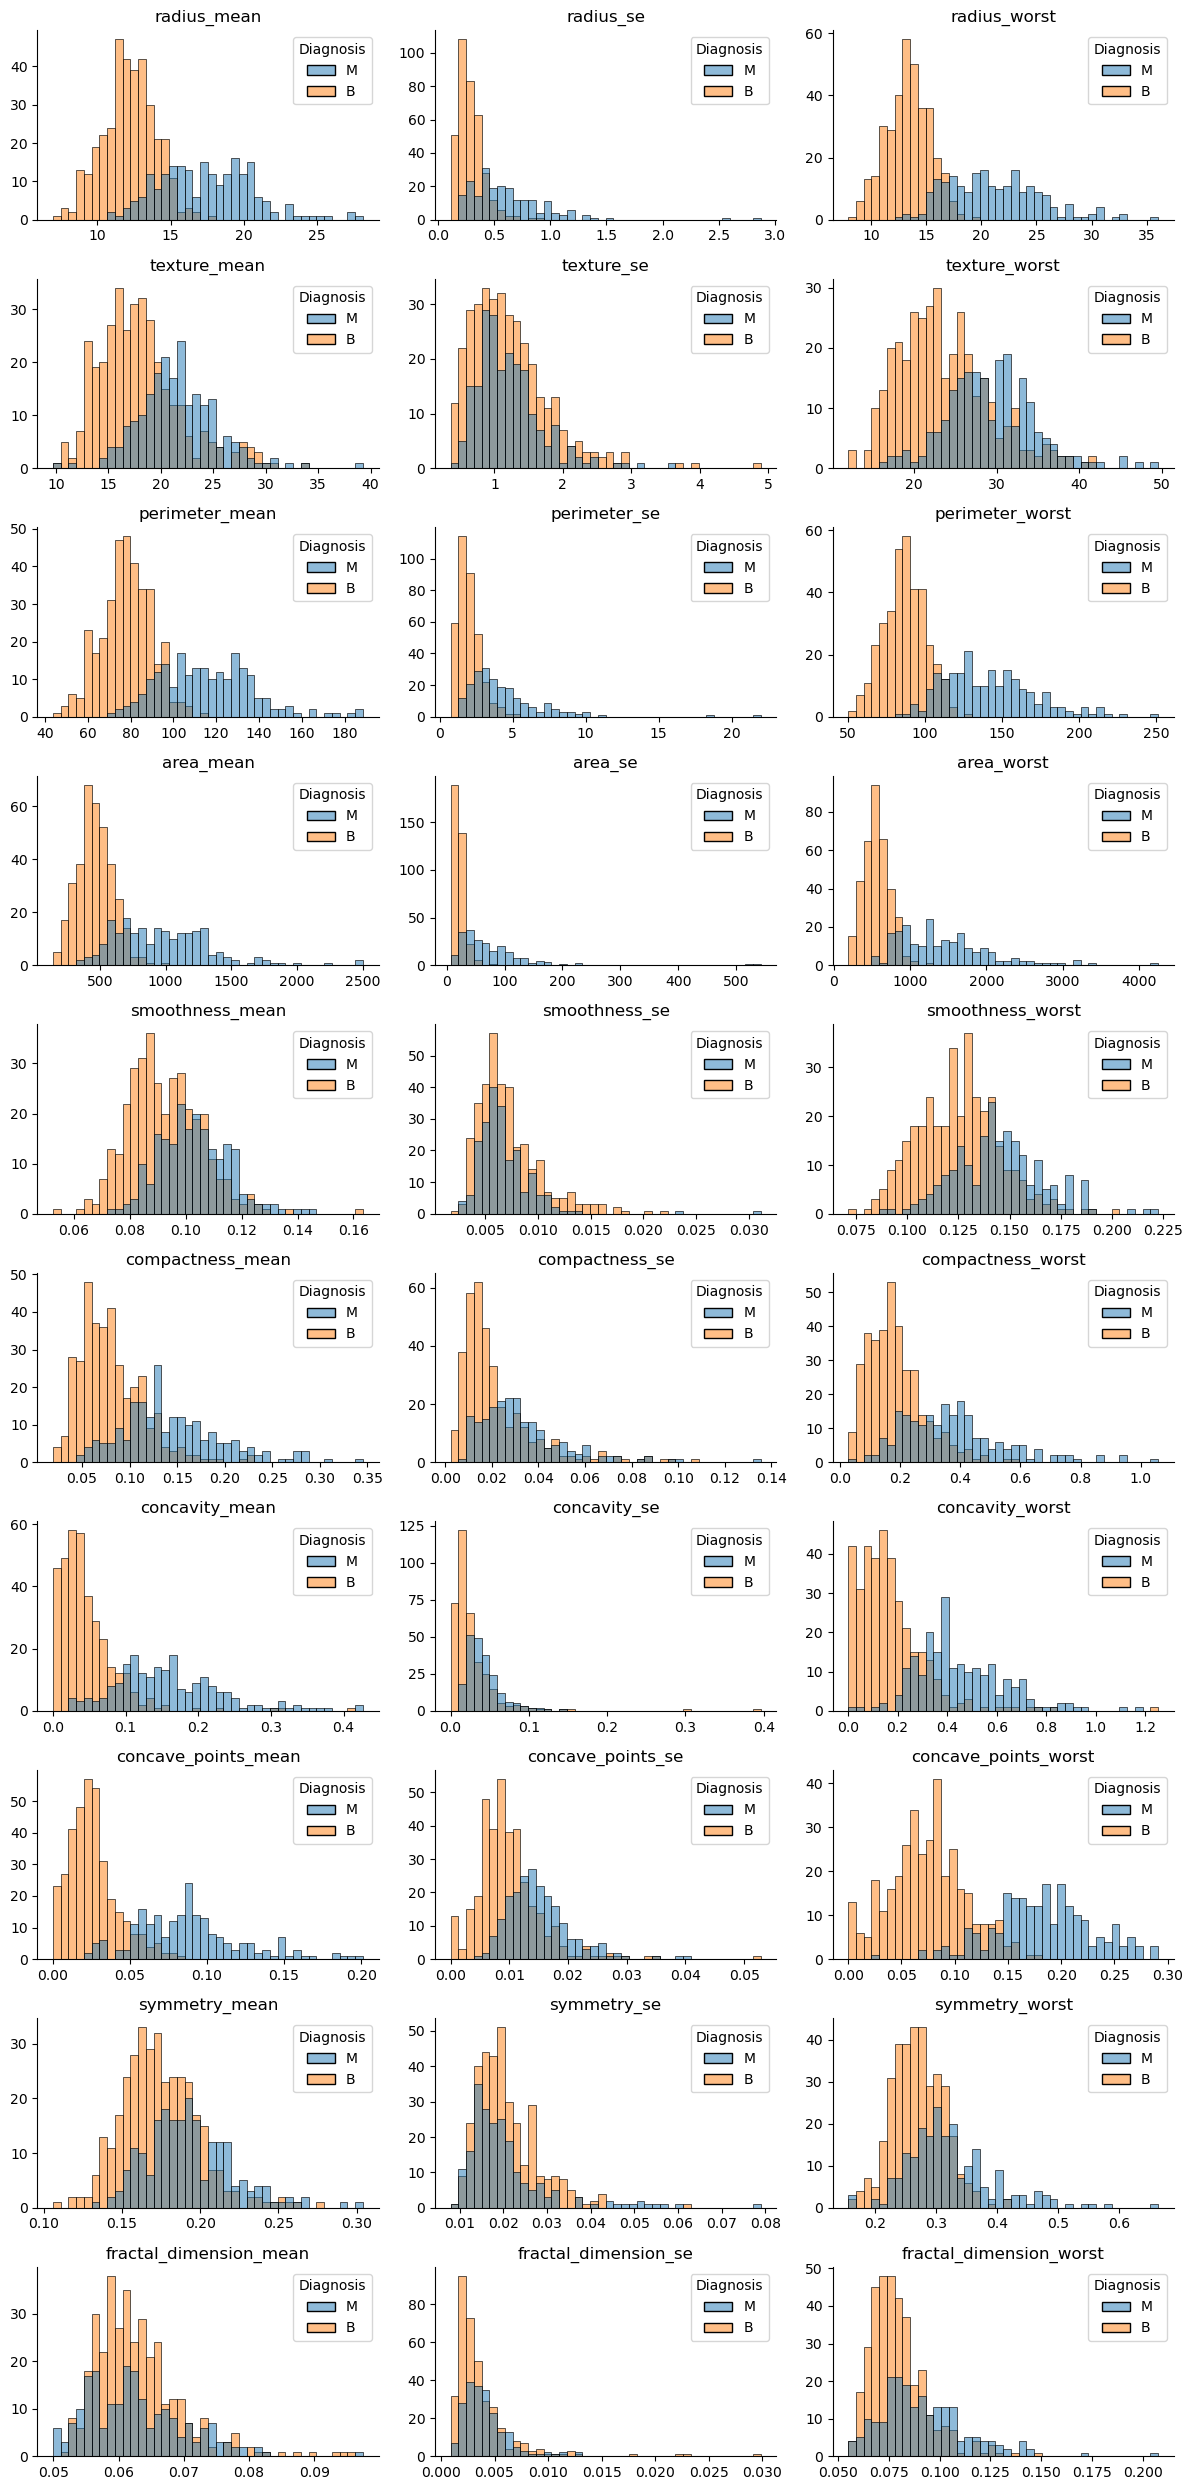

In [97]:
cols = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']
col2=['_mean','_se','_worst']

fig,axs=plt.subplots(10,3, figsize=(12,25))


for i in range(10):
    for j in range(3):
        sns.histplot(x=cols[i]+col2[j], hue='Diagnosis', data=dataset, ax=axs[i,j], bins=40)
        axs[i,j].set_title(cols[i]+col2[j], fontsize=12)
        axs[i,j].set_xlabel("")
        axs[i,j].set_ylabel("")
        sns.despine()
        
plt.tight_layout()
        

In [98]:
DiagnosisMap = {
    "M":1,"B":0
}

In [99]:
dataset['Diagnosis'] = dataset['Diagnosis'].map(DiagnosisMap)
dataset.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [100]:
#drop ID feature
dataset_2 = dataset.drop(columns='ID')

dataset_2.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [101]:
#x
x = dataset_2.drop(columns='Diagnosis')

x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
y= dataset_2['Diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

In [129]:
# random forest

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
#Train the model 0.25
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state=40)

In [132]:
#StandarScaler
standardScaler = StandardScaler()
standardScaler.fit(x_train)
x_train_scaled= standardScaler.transform(x_train)
x_test_scaled = standardScaler.transform(x_test)

In [133]:
rf=RandomForestClassifier(random_state=40)

#train
rf.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=40)

In [134]:
ytest_pred=rf.predict(x_test_scaled)
ytest_pred[:3]

array([0, 1, 0], dtype=int64)

In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate a confusion matrix for the model
confusion_matrix(y_test, ytest_pred)

array([[94,  4],
       [ 1, 44]], dtype=int64)

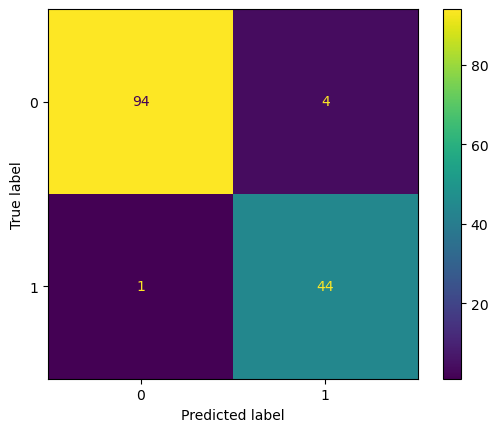

In [136]:
ConfusionMatrixDisplay.from_estimator(rf,x_test_scaled,y_test)

In [137]:
from sklearn.metrics import classification_report
# Print the classification report for the model

print(classification_report(y_test, ytest_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        98
           1       0.92      0.98      0.95        45

    accuracy                           0.97       143
   macro avg       0.95      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



Text(0.5, 1.0, 'ROC of Test Dataset')

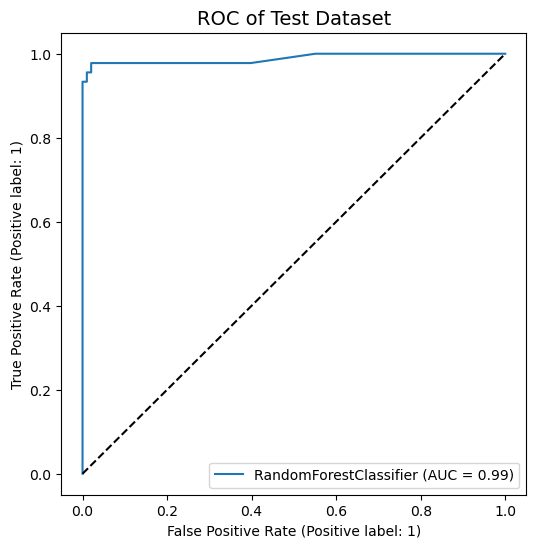

In [138]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(6,6))
ax=plt.gca()

RocCurveDisplay.from_estimator(rf,x_test_scaled,y_test, ax=ax)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC of Test Dataset', fontsize=14)

In [139]:
#Cross validate the accuracy of the random forest model 
cv_accuracy_rf = cross_val_score(estimator=rf, X=x, y=y, cv=10)
print("Accuracy is {:.2f}%".format(cv_accuracy_rf.mean()*100))
print("Standard Deviation is {:.2f}%".format(cv_accuracy_rf.std()*100))

Accuracy is 96.49%
Standard Deviation is 2.60%


In [140]:
# importance

columns=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','smoothness_mean', 'compactness_mean', 'concavity_mean','concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 
         'radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst','symmetry_worst', 'fractal_dimension_worst']
df_feature_importance = pd.DataFrame(zip(columns,rf.feature_importances_), columns=['feature','importance'])
df_feature_importance

,feature,importance
0,radius_mean,0.057080
1,texture_mean,0.019485
2,perimeter_mean,0.039330
3,area_mean,0.069296
4,smoothness_mean,0.003753
5,compactness_mean,0.008317
6,concavity_mean,0.035804
7,concave points_mean,0.112805
8,symmetry_mean,0.004920
9,fractal_dimension_mean,0.003587


Text(0.5, 1.0, "Feature's Importance of RandomForest Model")

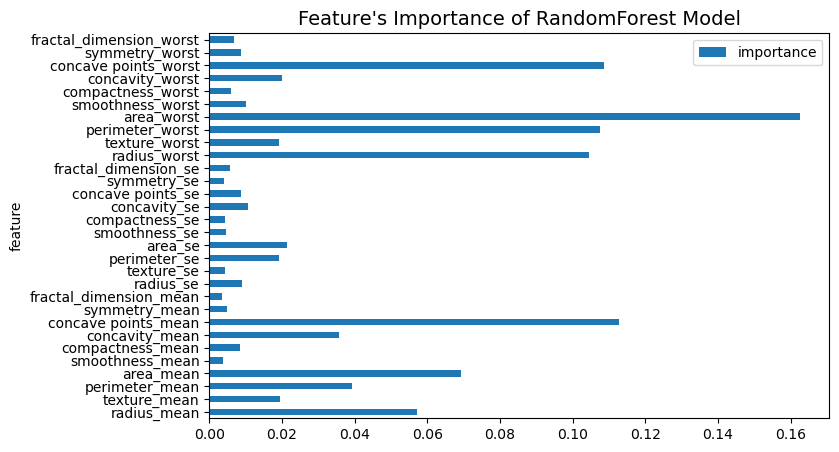

In [141]:
plt.figure(figsize=(8,5))
ax=plt.gca()
df_feature_importance.set_index('feature').plot(kind='barh', ax=ax)
plt.title("Feature's Importance of RandomForest Model", fontsize=14)